<a href="https://colab.research.google.com/github/AdityaFaisal/DataMining_KNN/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
dataset = pd.read_csv('chord-progressions.csv')
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -2].values

In [27]:
print(x)

[[1 5]
 [1 5]
 [1 1]
 [4 5]
 [2 5]
 [2 4]
 [4 6]
 [1 4]
 [1 4]
 [4 3]
 [6 5]
 [3 6]
 [1 6]
 [5 4]
 [1 5]
 [6 4]
 [3 7]
 [4 5]
 [5 5]
 [4 4]
 [5 4]
 [1 1]
 [1 4]
 [5 1]
 [1 4]
 [4 6]
 [5 7]
 [7 6]
 [1 6]
 [5 4]
 [1 5]
 [6 4]
 [3 7]
 [4 5]
 [5 5]
 [4 4]
 [5 4]
 [1 1]
 [1 4]
 [5 1]
 [1 4]
 [4 6]
 [5 7]
 [7 6]]


In [28]:
print(y)

[5 5 1 5 5 4 6 4 4 3 5 6 6 4 5 4 7 5 5 4 4 1 4 1 4 6 7 6 6 4 5 4 7 5 5 4 4
 1 4 1 4 6 7 6]


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [30]:
print(x_train)

[[5 4]
 [4 6]
 [1 1]
 [7 6]
 [5 5]
 [6 4]
 [1 4]
 [3 7]
 [1 4]
 [1 4]
 [5 4]
 [2 4]
 [4 5]
 [3 7]
 [1 5]
 [4 4]
 [1 4]
 [5 5]
 [1 5]
 [5 7]
 [1 6]
 [4 5]
 [1 4]
 [4 6]
 [5 1]
 [5 4]
 [1 1]
 [4 4]
 [4 3]
 [5 1]
 [5 7]
 [4 5]
 [1 5]]


In [31]:
print(x_test)

[[1 5]
 [1 1]
 [7 6]
 [2 5]
 [6 5]
 [4 6]
 [1 6]
 [3 6]
 [1 4]
 [6 4]
 [5 4]]


In [32]:
print(y_train)

[4 6 1 6 5 4 4 7 4 4 4 4 5 7 5 4 4 5 5 7 6 5 4 6 1 4 1 4 3 1 7 5 5]


In [33]:
print(y_test)

[5 1 6 5 5 6 6 6 4 4 4]


In [34]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [35]:
print(x_train)

[[ 0.92539864 -0.27496334]
 [ 0.38007444  0.93487536]
 [-1.25589815 -2.08972139]
 [ 2.01604704  0.93487536]
 [ 0.92539864  0.32995601]
 [ 1.47072284 -0.27496334]
 [-1.25589815 -0.27496334]
 [-0.16524976  1.53979471]
 [-1.25589815 -0.27496334]
 [-1.25589815 -0.27496334]
 [ 0.92539864 -0.27496334]
 [-0.71057396 -0.27496334]
 [ 0.38007444  0.32995601]
 [-0.16524976  1.53979471]
 [-1.25589815  0.32995601]
 [ 0.38007444 -0.27496334]
 [-1.25589815 -0.27496334]
 [ 0.92539864  0.32995601]
 [-1.25589815  0.32995601]
 [ 0.92539864  1.53979471]
 [-1.25589815  0.93487536]
 [ 0.38007444  0.32995601]
 [-1.25589815 -0.27496334]
 [ 0.38007444  0.93487536]
 [ 0.92539864 -2.08972139]
 [ 0.92539864 -0.27496334]
 [-1.25589815 -2.08972139]
 [ 0.38007444 -0.27496334]
 [ 0.38007444 -0.87988269]
 [ 0.92539864 -2.08972139]
 [ 0.92539864  1.53979471]
 [ 0.38007444  0.32995601]
 [-1.25589815  0.32995601]]


In [36]:
print(x_test)

[[-1.06144556  0.19205532]
 [-1.06144556 -2.62475604]
 [ 1.63299316  0.89625816]
 [-0.61237244  0.19205532]
 [ 1.18392004  0.19205532]
 [ 0.2857738   0.89625816]
 [-1.06144556  0.89625816]
 [-0.16329932  0.89625816]
 [-1.06144556 -0.51214752]
 [ 1.18392004 -0.51214752]
 [ 0.73484692 -0.51214752]]


In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0 0]
 [0 3 0 0]
 [0 1 2 0]
 [0 0 3 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


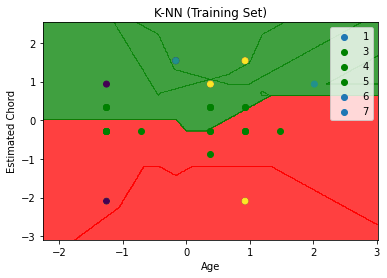

In [40]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:,0].max()+1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Chord')
plt.legend()
plt.show()